In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("S02-hw-dataset.csv")
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [4]:
# показать имена колонок в repr, чтобы увидеть невидимые символы
for c in df.columns:
    print(repr(c))

# убрать пробелы по краям в названиях
df.columns = df.columns.str.strip()
print("Columns after strip:", df.columns.tolist())
# доля пропусков
print("Доля пропусков по столбцам:\n", df.isna().mean())

# количество полностью дублирующих строк
print("Полные дубликаты:", df.duplicated().sum())
# показать дубли, если есть
if df.duplicated().sum() > 0:
    display(df[df.duplicated()])

'user_id'
'age'
'country'
'purchases'
'revenue'
Columns after strip: ['user_id', 'age', 'country', 'purchases', 'revenue']
Доля пропусков по столбцам:
 user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64
Полные дубликаты: 1


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [5]:
# отрицательные покупки
neg_purchases = df[df["purchases"] < 0]
print("Отрицательные purchases:", len(neg_purchases))
display(neg_purchases)

# очень большой возраст (логический порог: >100)
age_too_big = df[df["age"] > 100]
print("Возраст >100:", len(age_too_big))
display(age_too_big)

# логический конфликт: revenue == 0 при purchases > 0
conflict = df[(df["revenue"] == 0) & (df["purchases"] > 0)]
print("revenue==0 & purchases>0:", len(conflict))
display(conflict)

# объединённая маска проблем
problem_mask = (df["purchases"] < 0) | (df["age"] > 100) | ((df["revenue"] == 0) & (df["purchases"] > 0))
print("Всего проблемных строк:", problem_mask.sum())
display(df[problem_mask])

Отрицательные purchases: 1


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Возраст >100: 1


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


revenue==0 & purchases>0: 1


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


Всего проблемных строк: 2


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
10,11,24.0,US,4,0


In [6]:
# частоты стран
print("Counts by country:")
display(df["country"].value_counts())
display(df["country"].value_counts(normalize=True).rename("share"))

# агрегаты по стране
agg_by_country = df.groupby("country").agg(
    users = ("user_id","nunique"),
    avg_age = ("age","mean"),
    avg_purchases = ("purchases","mean"),
    sum_revenue = ("revenue","sum"),
    avg_revenue = ("revenue","mean")
).reset_index()
display(agg_by_country)

Counts by country:


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

country
RU    0.317073
FR    0.292683
US    0.195122
DE    0.146341
CN    0.048780
Name: share, dtype: float64

,country,users,avg_age,avg_purchases,sum_revenue,avg_revenue
0,CN,2,24.000000,4.500000,2108,1054.000000
1,DE,6,34.600000,6.500000,8673,1445.500000
2,FR,12,46.250000,4.250000,8111,675.916667
3,RU,12,30.076923,4.769231,10271,790.076923
4,US,8,36.714286,4.625000,4459,557.375000


In [7]:
# создать возрастные группы
bins = [0, 18, 25, 35, 50, 100, 200]
labels = ["0-17","18-24","25-34","35-49","50-99","100+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)
display(df["age_group"].value_counts(dropna=False))

age_group
25-34    11
18-24    10
35-49     9
50-99     6
0-17      2
NaN       2
100+      1
Name: count, dtype: int64

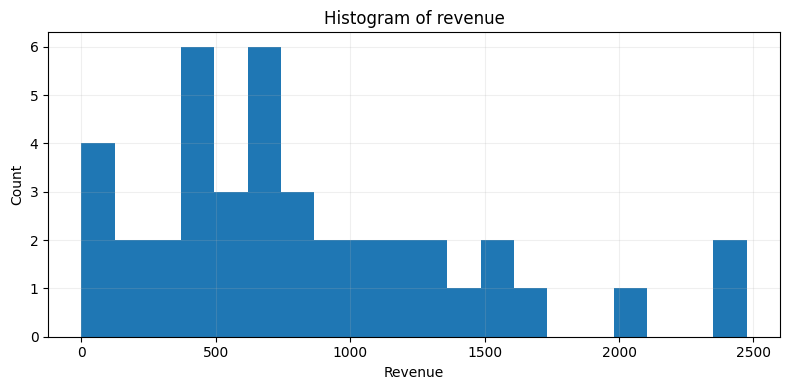

In [8]:
plt.figure(figsize=(8,4))
plt.hist(df["revenue"].dropna(), bins=20)
plt.title("Histogram of revenue")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig("figures/hist_revenue.png")   # путь относительно HW02.ipynb
plt.show()
plt.close()

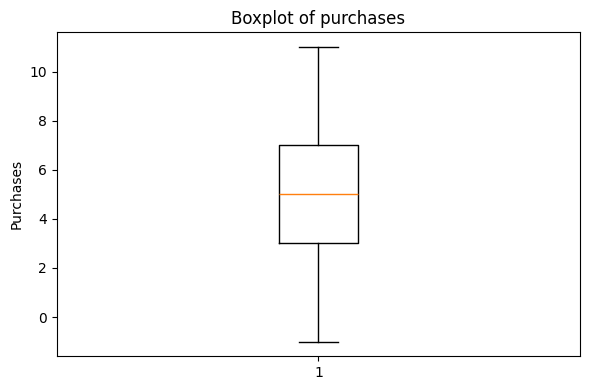

C:\Users\Professional\AppData\Local\Temp\ipykernel_7892\2430293079.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=countries)


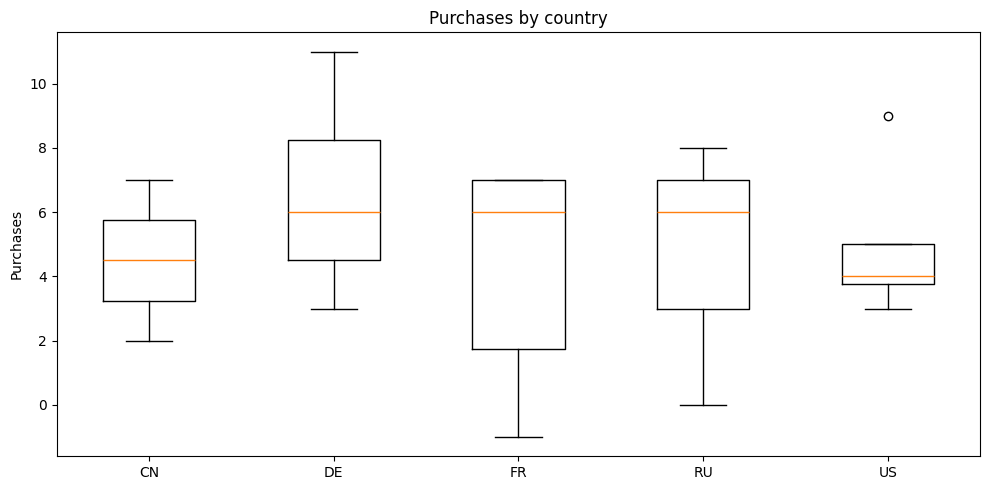

In [9]:
# общий
plt.figure(figsize=(6,4))
plt.boxplot(df["purchases"].dropna())
plt.title("Boxplot of purchases")
plt.ylabel("Purchases")
plt.tight_layout()
plt.savefig("figures/box_purchases.png")
plt.show()
plt.close()

# по странам (если стран немного)
countries = sorted(df["country"].dropna().unique())
data = [df.loc[df["country"]==c, "purchases"].dropna() for c in countries]
plt.figure(figsize=(10,5))
plt.boxplot(data, labels=countries)
plt.title("Purchases by country")
plt.ylabel("Purchases")
plt.tight_layout()
plt.savefig("figures/box_purchases_by_country.png")
plt.show()
plt.close()

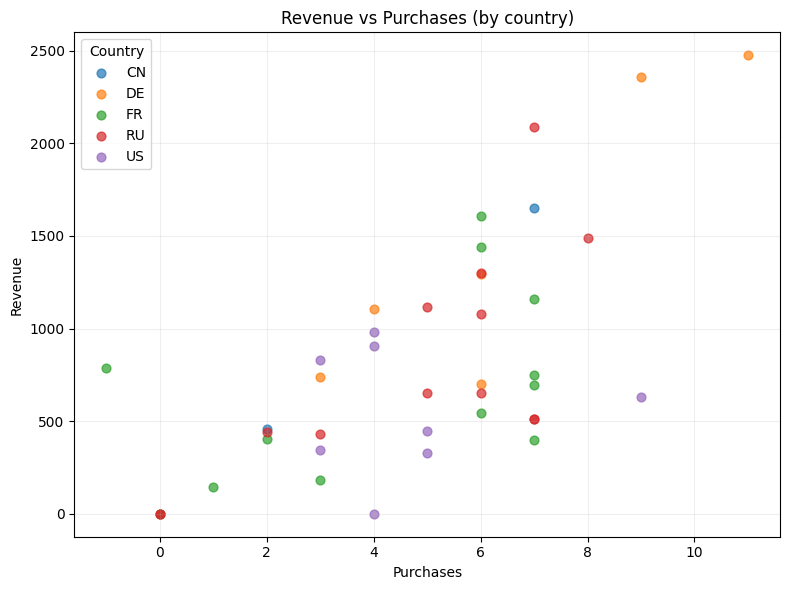

In [10]:
plt.figure(figsize=(8,6))
for c in sorted(df["country"].dropna().unique()):
    sub = df[df["country"] == c]
    plt.scatter(sub["purchases"], sub["revenue"], label=c, alpha=0.7, s=40)
plt.title("Revenue vs Purchases (by country)")
plt.xlabel("Purchases")
plt.ylabel("Revenue")
plt.legend(title="Country")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig("figures/scatter_rev_pur_by_country.png")
plt.show()
plt.close()

In [11]:
# сохранить агрегацию
agg_by_country.to_csv("agg_by_country.csv", index=False)